### Import required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Records of given dataset
- From UCI repository

In [6]:
df= pd.read_csv("E-Commerce Dataset.csv", delimiter=',', encoding='ISO-8859-1')  #reading a CSV file using comma as the separator, and you're decoding the text using ISO-8859-1 encoding to avoid character-related errors.
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Description of Numeric features

In [9]:
df.describe().T   #Transpose

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


### Description of Non-numeric features

In [11]:
df.describe(exclude=["int64", "float64"]).T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


### Check for null values

In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Shape of data

In [15]:
df.shape

(541909, 8)

### Drop all missing records

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(406829, 8)

In [19]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Check whether negative values present in Quantity and Unit Price

In [21]:
df[df["Quantity"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [22]:
df[df["UnitPrice"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Dropping negative values of Quantity

In [24]:
df.drop(df[df["Quantity"]<0].index, inplace=True)  # df = df[df["Quantity"] >= 0]

In [25]:
df.shape

(397924, 8)

### Calculate Total Amount or monetary value

In [27]:
df["Sales"]=df["Quantity"] * df["UnitPrice"]

In [28]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


### Uniquely defining each customers purchase

In [30]:
new_data= df.groupby("CustomerID")["Sales"].sum().reset_index()  
new_data

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [31]:
type(new_data)

pandas.core.frame.DataFrame

### Calculating number of transactions of each customer

In [33]:
num_trans= df.groupby("CustomerID")["InvoiceNo"].count().reset_index()  
num_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [34]:
type(num_trans)

pandas.core.frame.DataFrame

### Calculate Last Transaction

In [36]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])

In [37]:
df["Last Transaction"]= (df["InvoiceDate"].max() - df["InvoiceDate"])
df["Last Transaction"]

0        373 days 04:24:00
1        373 days 04:24:00
2        373 days 04:24:00
3        373 days 04:24:00
4        373 days 04:24:00
                ...       
541904     0 days 00:00:00
541905     0 days 00:00:00
541906     0 days 00:00:00
541907     0 days 00:00:00
541908     0 days 00:00:00
Name: Last Transaction, Length: 397924, dtype: timedelta64[ns]

In [38]:
df["Last Transaction"]=df["Last Transaction"].dt.days

In [39]:
 df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Last Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0


In [40]:
lt=df.groupby(["CustomerID", "Country"])["Last Transaction"].max().reset_index()
lt

,CustomerID,Country,Last Transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


### Merge tables

In [42]:
merge_table= pd.merge(lt, num_trans, how="inner", on="CustomerID")
new_df= pd.merge(merge_table, new_data, how="inner", on="CustomerID")
new_df

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


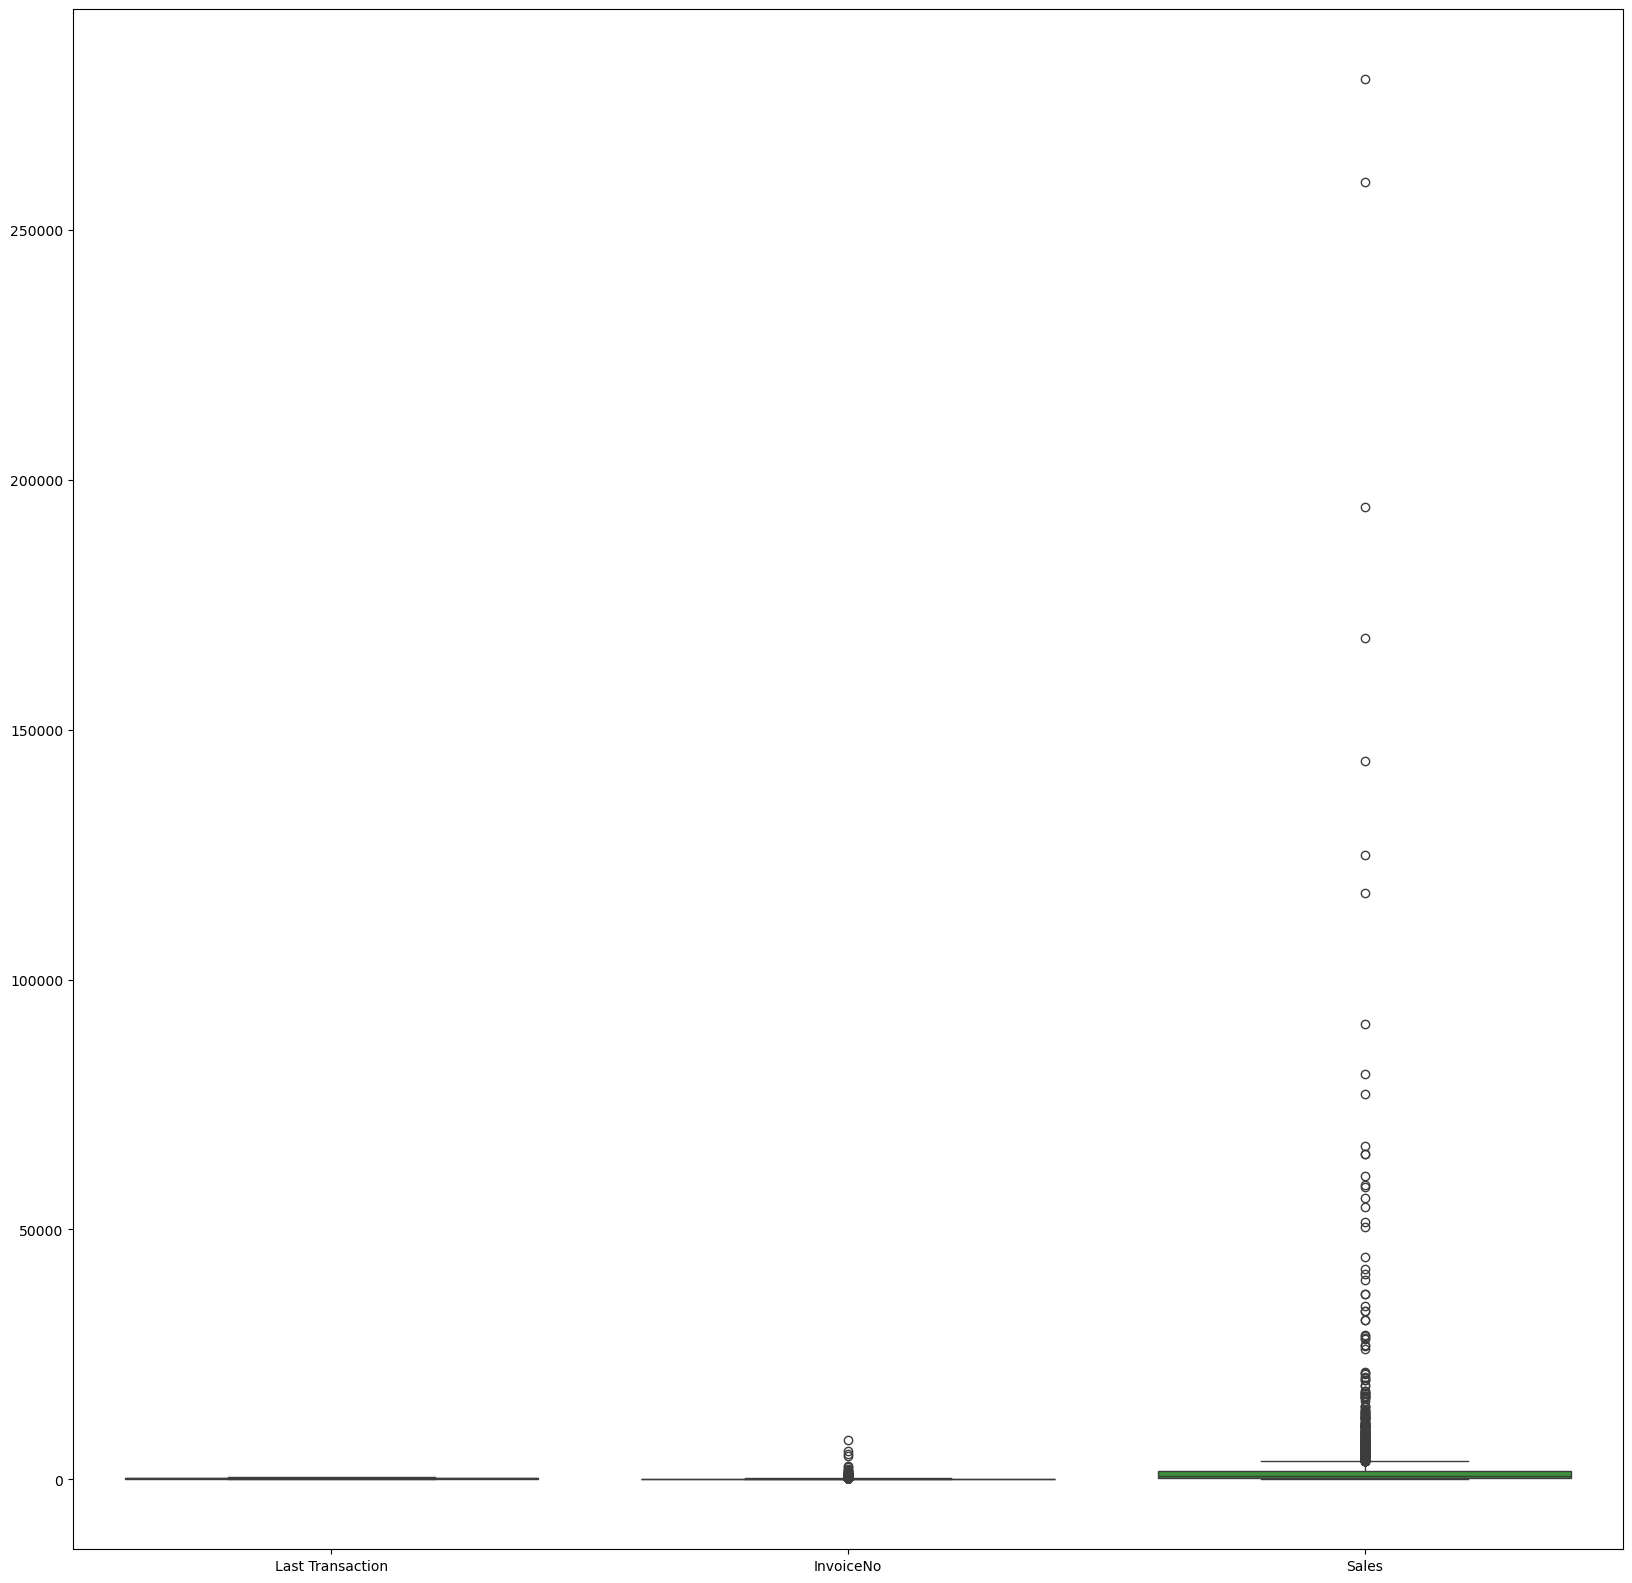

In [43]:
plt.figure(figsize=(20,20))
sns.boxplot(data=new_df[['Last Transaction', 'InvoiceNo','Sales']])
plt.show()

### Removal of Outliers using IQR

In [45]:
Q1=new_df['Sales'].quantile(0.25)
Q3=new_df['Sales'].quantile(0.75)
IQR= Q3-Q1
lower_limit =Q1-1.5*IQR
upper_limit =Q3+1.5*IQR
new_df_iqr = new_df[(new_df['Sales']>lower_limit) & (new_df['Sales']<upper_limit)]
new_df_iqr.shape

(3923, 5)

In [46]:
new_df_iqr


,CustomerID,Country,Last Transaction,InvoiceNo,Sales
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
5,12352.0,Norway,296,85,2506.04
6,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


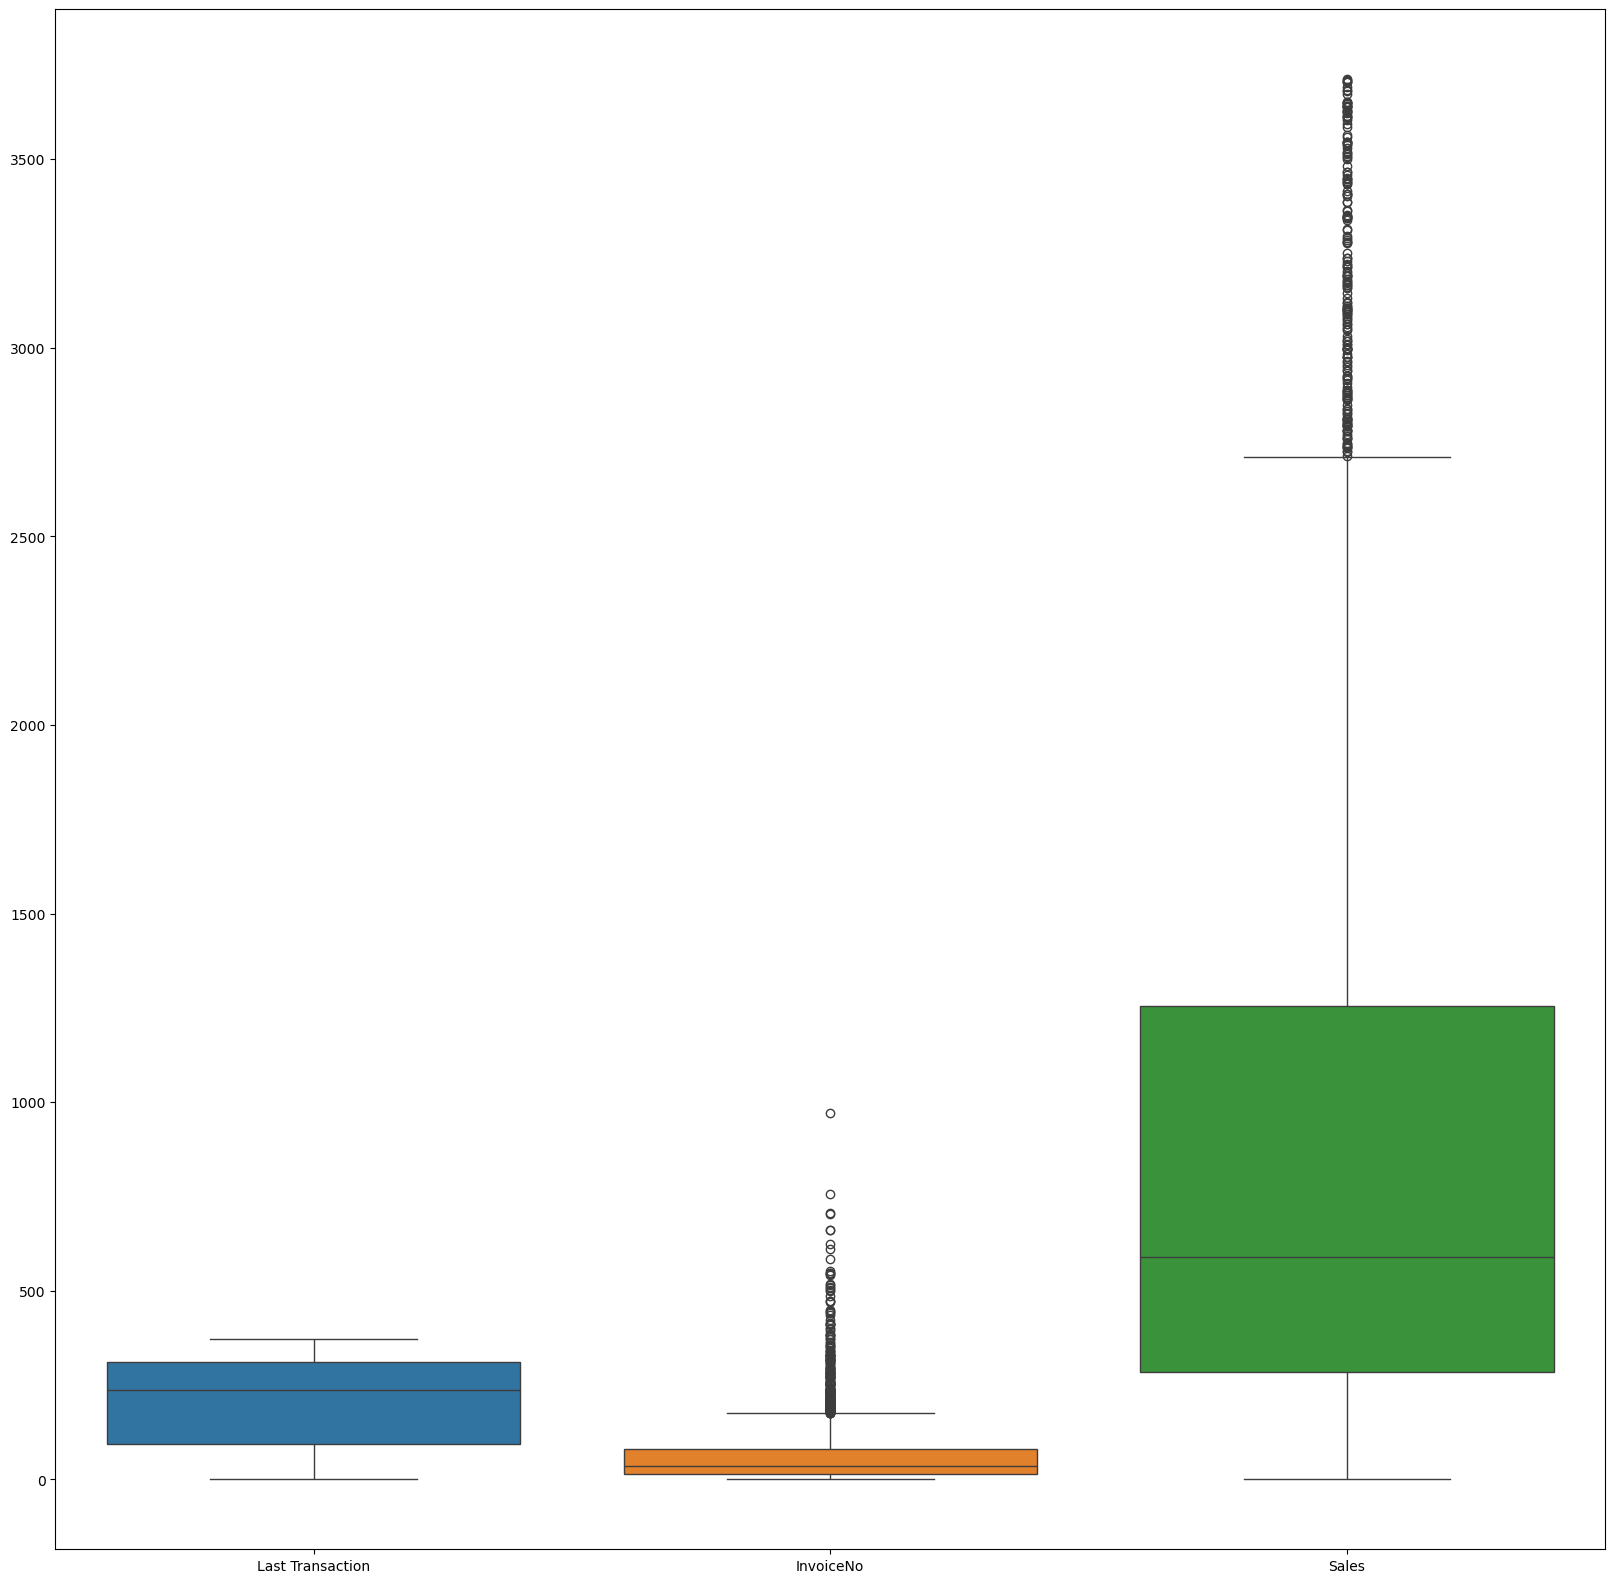

In [47]:
plt.figure(figsize=(20,20))
sns.boxplot(data=new_df_iqr[['Last Transaction', 'InvoiceNo','Sales']])
plt.show()

In [48]:
new_df_iqr=new_df_iqr.reset_index()
new_df_iqr

,index,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,2,12348.0,Finland,357,31,1797.24
1,3,12349.0,Italy,18,73,1757.55
2,4,12350.0,Norway,309,17,334.40
3,5,12352.0,Norway,296,85,2506.04
4,6,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...,...
3918,4342,18280.0,United Kingdom,277,10,180.60
3919,4343,18281.0,United Kingdom,180,7,80.82
3920,4344,18282.0,United Kingdom,125,12,178.05
3921,4345,18283.0,United Kingdom,336,756,2094.88


### Visualization of correlation matrix using heatmap

In [50]:
corr_matrix=new_df_iqr[['CustomerID','Last Transaction', 'InvoiceNo', 'Sales']].corr()

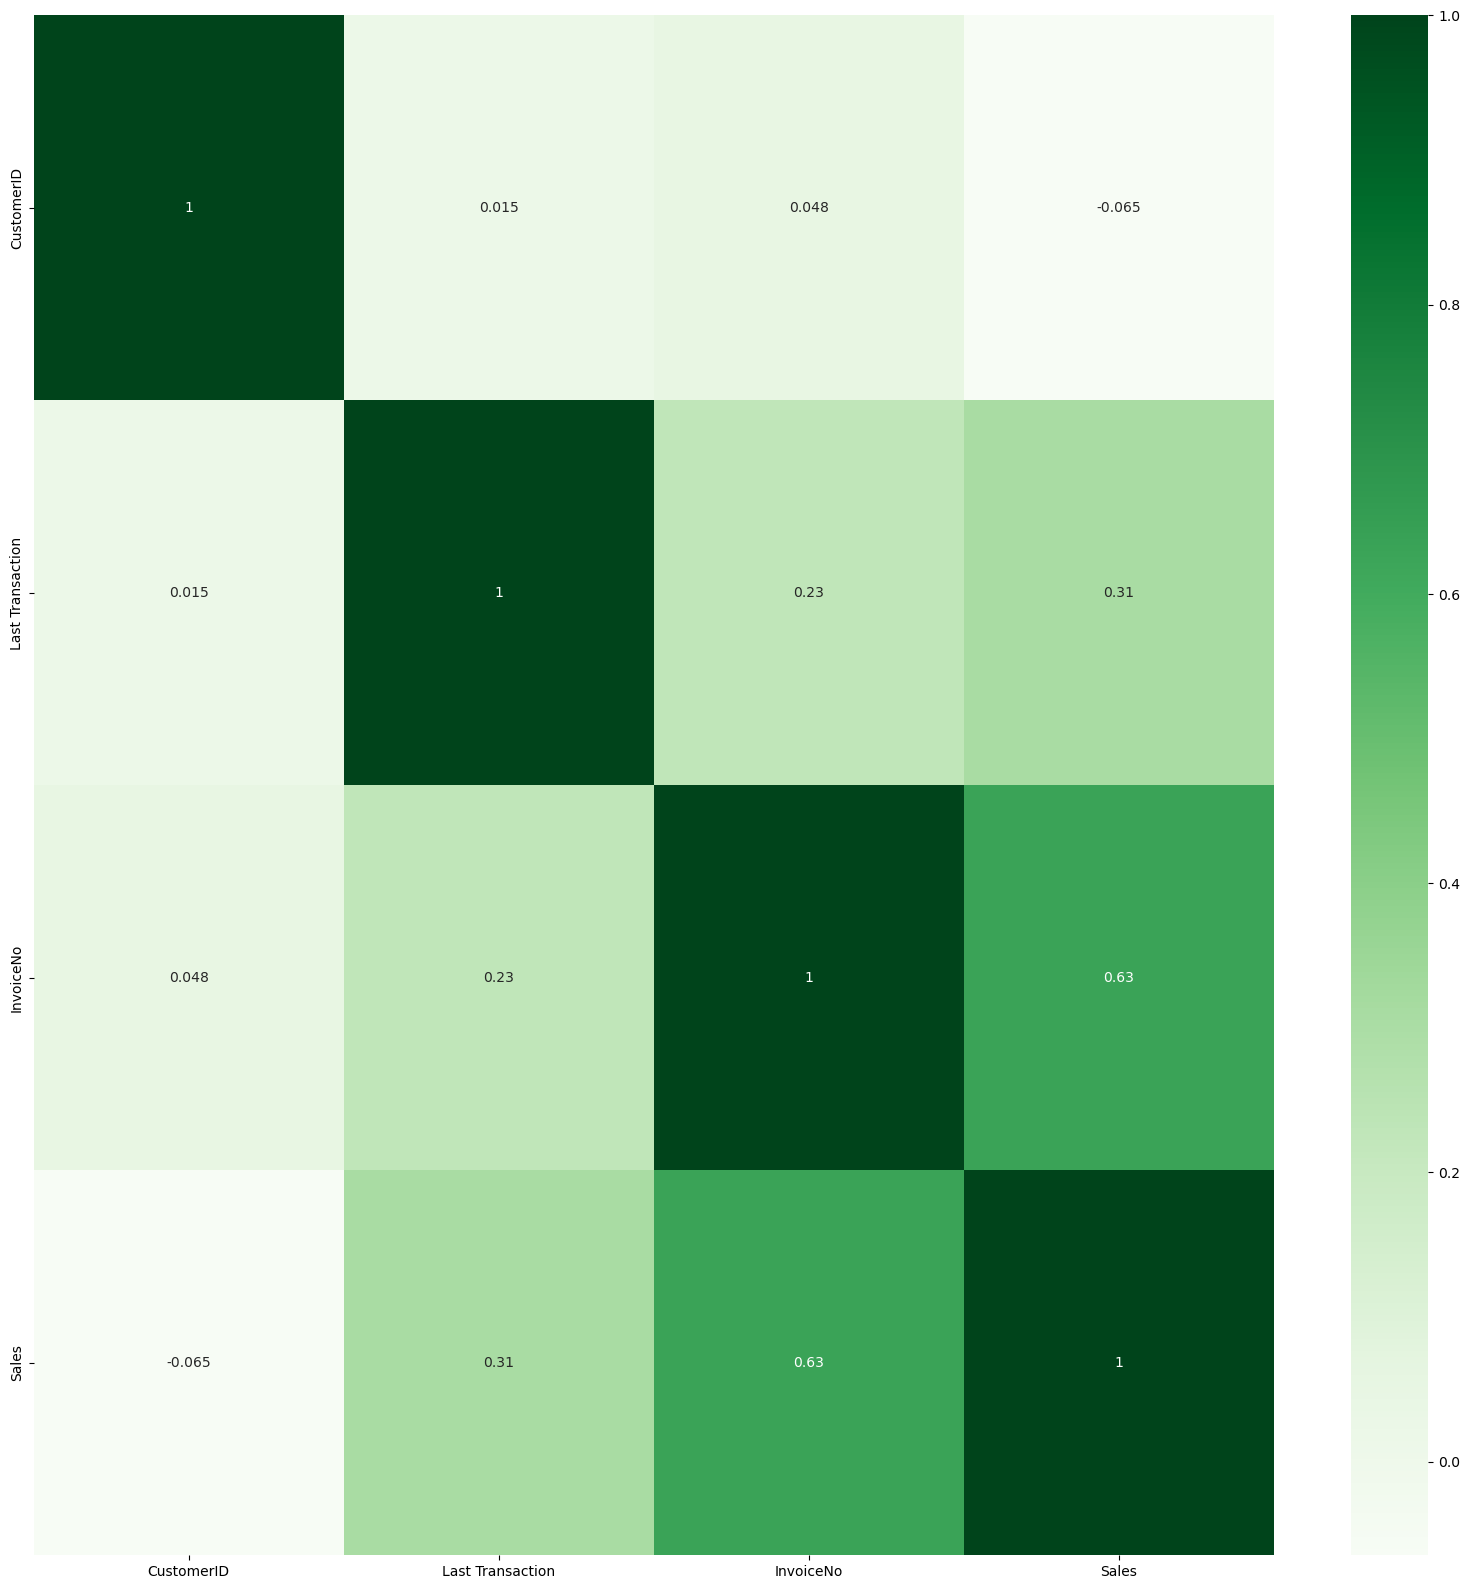

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(data=corr_matrix, cmap="Greens", annot= True)
plt.show()

### Normalization of given dataset using MinMaxScalar

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
new_df2= new_df_iqr[['Last Transaction', 'InvoiceNo', 'Sales']]
scaler=MinMaxScaler()
scaled_df = scaler.fit_transform(new_df2)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns= ['Last Transaction', 'InvoiceNo', 'Sales']
scaled_df['Country'] = new_df_iqr['Country']
scaled_df

,Last Transaction,InvoiceNo,Sales,Country
0,0.957105,0.030960,0.484200,Finland
1,0.048257,0.074303,0.473507,Italy
2,0.828418,0.016512,0.090092,Norway
3,0.793566,0.086687,0.675160,Norway
4,0.544236,0.003096,0.023978,Bahrain
...,...,...,...,...
3918,0.742627,0.009288,0.048656,United Kingdom
3919,0.482574,0.006192,0.021774,United Kingdom
3920,0.335121,0.011352,0.047969,United Kingdom
3921,0.900804,0.779154,0.564388,United Kingdom


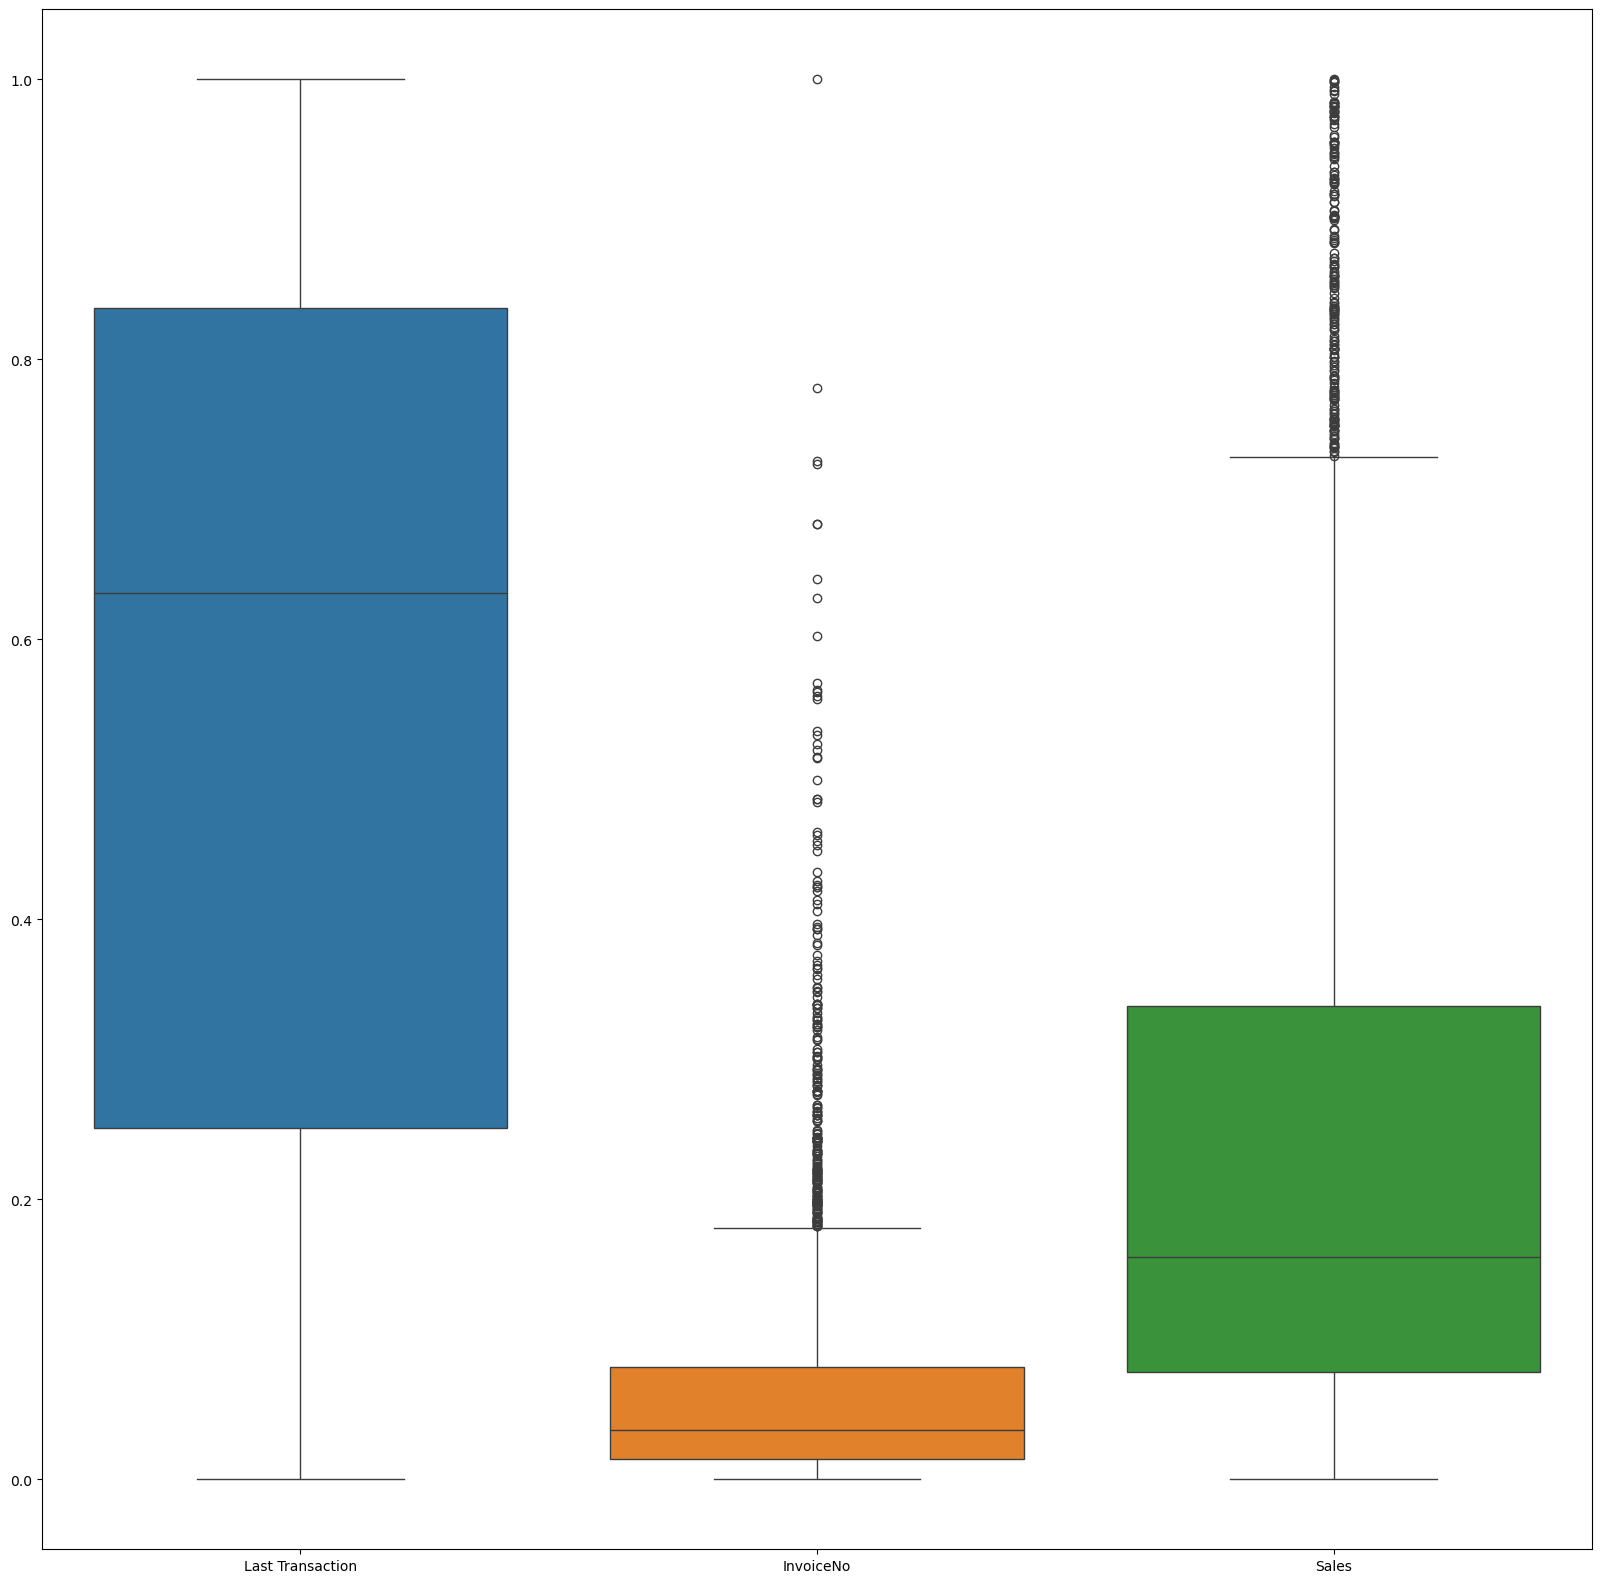

In [55]:
plt.figure(figsize=(20,20))
sns.boxplot(data=scaled_df[['Last Transaction', 'InvoiceNo','Sales']])
plt.show()

### K means Clustering - Plot the graph using Elbow Method 

In [57]:
from sklearn.cluster import KMeans

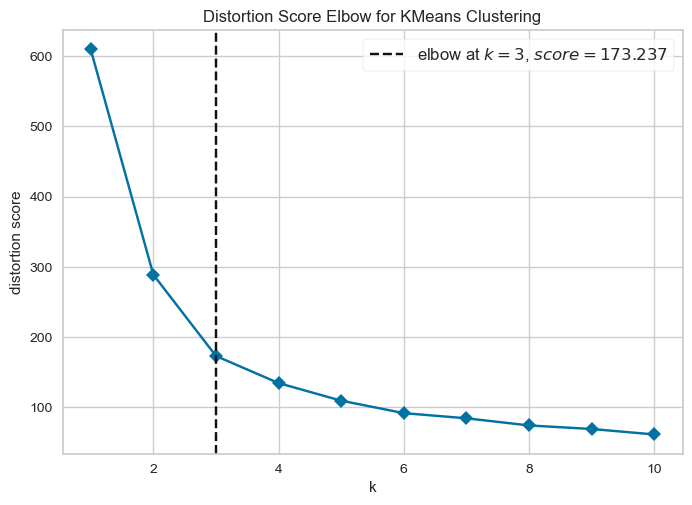

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
df_k= scaled_df.drop(columns=['Country'], axis=1)
# Elbow Method for K Means
# Import KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model= KMeans()
# k is range of number of clusters
visualizer= KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)   # Fit data to visualizer
visualizer.show()

In [59]:
km= KMeans(n_clusters=3, random_state=42)
cluster_labels= km.fit_predict(df_k)
df_k['clusters']= cluster_labels  # Labels(names) of clusters, the pts were assigned to
df_k

,Last Transaction,InvoiceNo,Sales,clusters
0,0.957105,0.030960,0.484200,2
1,0.048257,0.074303,0.473507,0
2,0.828418,0.016512,0.090092,1
3,0.793566,0.086687,0.675160,2
4,0.544236,0.003096,0.023978,1
...,...,...,...,...
3918,0.742627,0.009288,0.048656,1
3919,0.482574,0.006192,0.021774,0
3920,0.335121,0.011352,0.047969,0
3921,0.900804,0.779154,0.564388,2


In [60]:
#NumPy array that contains the cluster labels assigned to each data point
km.labels_ # = cluster_labels

array([2, 0, 1, ..., 0, 2, 2])

In [61]:
# This gives the coordinates of the centroids
km.cluster_centers_
# The fewer ur dimensions, the better ur clusters are

array([[0.22076895, 0.04001774, 0.14851301],
       [0.77654069, 0.04300147, 0.15802412],
       [0.79834825, 0.15821687, 0.63465266]])

### Model Evaluation

In [63]:
from sklearn.metrics import silhouette_samples, silhouette_score
score= silhouette_score(df_k, km.labels_, metric='euclidean')
print(score)

0.7738234950686357
